# Engineering Statistics Final Project: Housing Price Analysis

### 1. Data Exploration and Visualization

##### Data Importation

In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv('KCHousingPrices.csv')

##### Visualization of the Price ($1000) Variable

In [3]:
# box-and-whisker plot of the price variable
boxplot = data.boxplot(column=['price ($1000)'], figsize=(3,8), grid=False)
boxplot

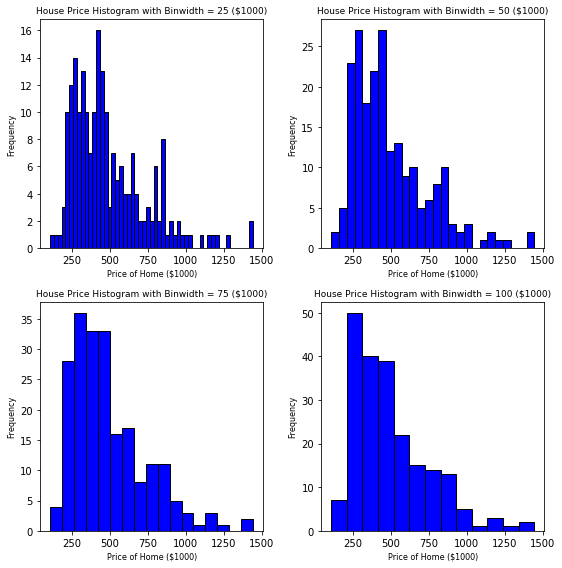

In [4]:
# histograms for price variable
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))

for i, binwidth in enumerate([25, 50, 75, 100]):
    # add the subplot
    ax = fig.add_subplot(221+i)
    
    # draw the plot
    ax.hist(data['price ($1000)'], bins = int((1445-107)/binwidth),
             color = 'blue', edgecolor = 'black')
    
    # title and labels
    ax.set_title('House Price Histogram with Binwidth = %d ($1000)' % binwidth, size = 9)
    ax.set_xlabel('Price of Home ($1000)', size = 8)
    ax.set_ylabel('Frequency', size= 8)

plt.tight_layout()
plt.show()

##### Visualization of Remaining Variables

In [5]:
# Summary statistics
data_summary = data.drop(['id', 'price ($1000)'], axis=1)
data_summary.loc[data_summary['yr_renovated'] == 0, 'yr_renovated'] = np.nan
summary = data_summary.describe()
summary.T

,count,mean,std,min,25%,50%,75%,max
bedrooms,212.0,3.424528,0.953399,1.0000,3.000000,3.00000,4.00000,6.0000
bathrooms,212.0,2.086085,0.750960,1.0000,1.687500,2.25000,2.50000,5.0000
sqft_living,212.0,2045.905660,828.253093,600.0000,1465.000000,1875.00000,2502.50000,4920.0000
floors,212.0,1.544811,0.554278,1.0000,1.000000,1.50000,2.00000,3.0000
view,212.0,0.207547,0.718305,0.0000,0.000000,0.00000,0.00000,4.0000
condition,212.0,3.330189,0.595746,2.0000,3.000000,3.00000,4.00000,5.0000
grade,212.0,7.646226,1.119553,5.0000,7.000000,7.00000,8.00000,11.0000
sqft_above,212.0,1764.349057,779.061521,600.0000,1175.000000,1550.00000,2260.00000,4130.0000
yr_built,212.0,1971.136792,29.787640,1901.0000,1948.000000,1976.50000,1997.00000,2015.0000
yr_renovated,8.0,1989.500000,15.099669,1964.0000,1985.250000,1988.50000,1995.50000,2012.0000


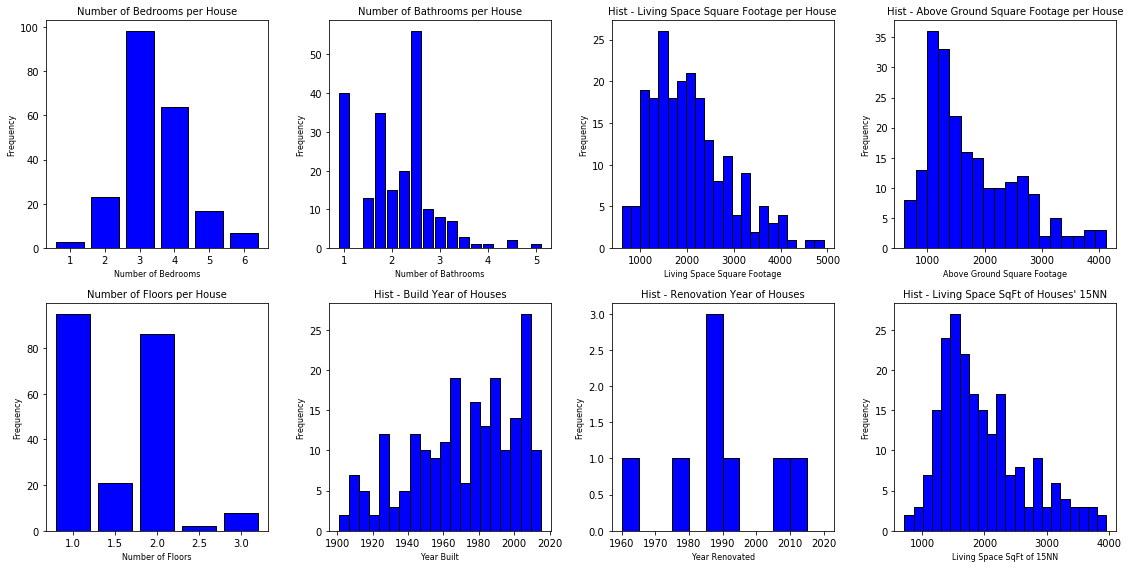

In [6]:
bed_counts = [0,0,0,0,0,0]
num_beds = [1,2,3,4,5,6]

for i, row in pd.DataFrame(data).iterrows():
    for j in range(0, 6):
        if row['bedrooms'] == num_beds[j]:
            bed_counts[j] = bed_counts[j] + 1
            
bath_counts = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
num_baths = [1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.25,3.5,3.75,4,4.25,4.5,4.75,5]

for i, row in pd.DataFrame(data).iterrows():
    for j in range(0,17):
        if row['bathrooms'] == num_baths[j]:
            bath_counts[j] = bath_counts[j] + 1
            
floor_counts = [0,0,0,0,0]
num_floors = [1,1.5,2,2.5,3]

for i, row in pd.DataFrame(data).iterrows():
    for j in range(0,5):
        if row['floors'] == num_floors[j]:
            floor_counts[j] = floor_counts[j] + 1

            
            
# create figure
fig = plt.figure(figsize=(16,8))

# bedrooms subplot
ax = fig.add_subplot(241)
    
ax.bar(num_beds, bed_counts, color = 'blue', edgecolor = 'black', tick_label=num_beds)
    
ax.set_title('Number of Bedrooms per House', size = 10)
ax.set_xlabel('Number of Bedrooms', size = 8)
ax.set_ylabel('Frequency', size= 8)


# bathrooms subplot
ax2 = fig.add_subplot(242)
    
ax2.bar(num_baths, bath_counts, color = 'blue', edgecolor = 'black', width=.2)
    
ax2.set_title('Number of Bathrooms per House', size = 10)
ax2.set_xlabel('Number of Bathrooms', size = 8)
ax2.set_ylabel('Frequency', size= 8)


# sqft_living subplot
ax3 = fig.add_subplot(243)
    
ax3.hist(data['sqft_living'], bins = 22,
             color = 'blue', edgecolor = 'black')
    
ax3.set_title('Hist - Living Space Square Footage per House', size = 10)
ax3.set_xlabel('Living Space Square Footage', size = 8)
ax3.set_ylabel('Frequency', size= 8)


# sqft_above subplot
ax4 = fig.add_subplot(244)
    
ax4.hist(data['sqft_above'], bins = 18,
             color = 'blue', edgecolor = 'black')
    
ax4.set_title('Hist - Above Ground Square Footage per House', size = 10)
ax4.set_xlabel('Above Ground Square Footage', size = 8)
ax4.set_ylabel('Frequency', size= 8)

# floors subplot
ax5 = fig.add_subplot(245)
    
ax5.bar(num_floors, floor_counts, color = 'blue', edgecolor = 'black', width=.4, tick_label=num_floors)
    
ax5.set_title('Number of Floors per House', size = 10)
ax5.set_xlabel('Number of Floors', size = 8)
ax5.set_ylabel('Frequency', size= 8)

# yr_built subplot
ax6 = fig.add_subplot(246)
    
ax6.hist(data['yr_built'], bins = 20,
             color = 'blue', edgecolor = 'black')
    
ax6.set_title('Hist - Build Year of Houses', size = 10)
ax6.set_xlabel('Year Built', size = 8)
ax6.set_ylabel('Frequency', size= 8)

# yr_renovated subplot
ax7 = fig.add_subplot(247)
    
ax7.hist(data['yr_renovated'], bins = 12,
             color = 'blue', edgecolor = 'black', range=(1960,2020))
    
ax7.set_title('Hist - Renovation Year of Houses', size = 10)
ax7.set_xlabel('Year Renovated', size = 8)
ax7.set_ylabel('Frequency', size= 8)

# sqft_living15 subplot
ax8 = fig.add_subplot(248)
 
ax8.hist(data['sqft_living15'], bins = 22,
             color = 'blue', edgecolor = 'black')
    
ax8.set_title("Hist - Living Space SqFt of Houses' 15NN", size = 10)
ax8.set_xlabel('Living Space SqFt of 15NN', size = 8)
ax8.set_ylabel('Frequency', size= 8)


plt.tight_layout()
plt.show()

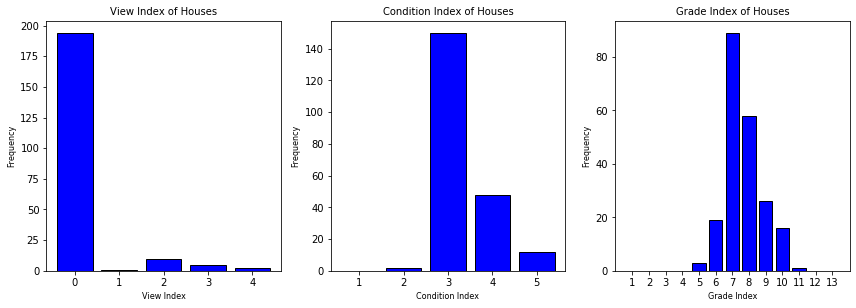

In [7]:
view_counts = [0,0,0,0,0]
view_scores = [0,1,2,3,4]

for i, row in pd.DataFrame(data).iterrows():
    for j in range(0,5):
        if row['view'] == view_scores[j]:
            view_counts[j] = view_counts[j] + 1
            

cond_counts = [0,0,0,0,0]
cond_scores = [1,2,3,4,5]

for i, row in pd.DataFrame(data).iterrows():
    for j in range(0,5):
        if row['condition'] == cond_scores[j]:
            cond_counts[j] = cond_counts[j] + 1
            
            
grade_counts = [0,0,0,0,0,0,0,0,0,0,0,0,0]
grade_scores = [1,2,3,4,5,6,7,8,9,10,11,12,13]

for i, row in pd.DataFrame(data).iterrows():
    for j in range(0,13):
        if row['grade'] == grade_scores[j]:
            grade_counts[j] = grade_counts[j] + 1

            
            
# create figure
fig = plt.figure(figsize=(12,8))

# view subplot
ax = fig.add_subplot(231)
    
ax.bar(view_scores, view_counts, color = 'blue', edgecolor = 'black', tick_label=view_scores)
    
ax.set_title('View Index of Houses', size = 10)
ax.set_xlabel('View Index', size = 8)
ax.set_ylabel('Frequency', size= 8)

# condition subplot
ax1 = fig.add_subplot(232)
    
ax1.bar(cond_scores, cond_counts, color = 'blue', edgecolor = 'black', tick_label=cond_scores)
    
ax1.set_title('Condition Index of Houses', size = 10)
ax1.set_xlabel('Condition Index', size = 8)
ax1.set_ylabel('Frequency', size= 8)

# grade subplot
ax2 = fig.add_subplot(233)

ax2.bar(grade_scores, grade_counts, color = 'blue', edgecolor = 'black', tick_label=grade_scores)
    
ax2.set_title('Grade Index of Houses', size = 10)
ax2.set_xlabel('Grade Index', size = 8)
ax2.set_ylabel('Frequency', size= 8)


plt.tight_layout()
plt.show()

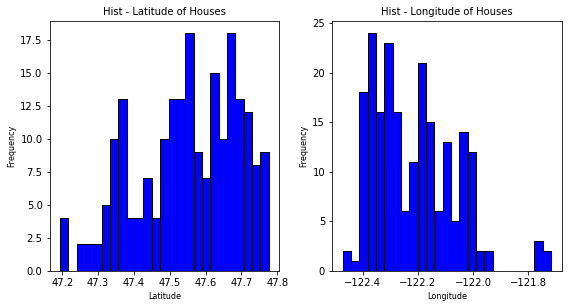

In [8]:
# create figure
fig = plt.figure(figsize=(8,8))

# latitude subplot
ax = fig.add_subplot(221)
    
ax.hist(data['latitude'], bins = 25,
             color = 'blue', edgecolor = 'black')
    
ax.set_title('Hist - Latitude of Houses', size = 10)
ax.set_xlabel('Latitude', size = 8)
ax.set_ylabel('Frequency', size= 8)

# longitude subplot
ax1 = fig.add_subplot(222)
    
ax1.hist(data['longitude'], bins = 25,
             color = 'blue', edgecolor = 'black')
    
ax1.set_title('Hist - Longitude of Houses', size = 10)
ax1.set_xlabel('Longitude', size = 8)
ax1.set_ylabel('Frequency', size= 8)

plt.tight_layout()
plt.show()

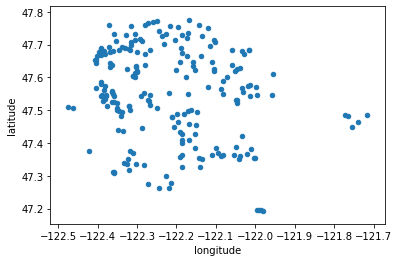

In [9]:
data.plot(kind='scatter', x='longitude', y='latitude')

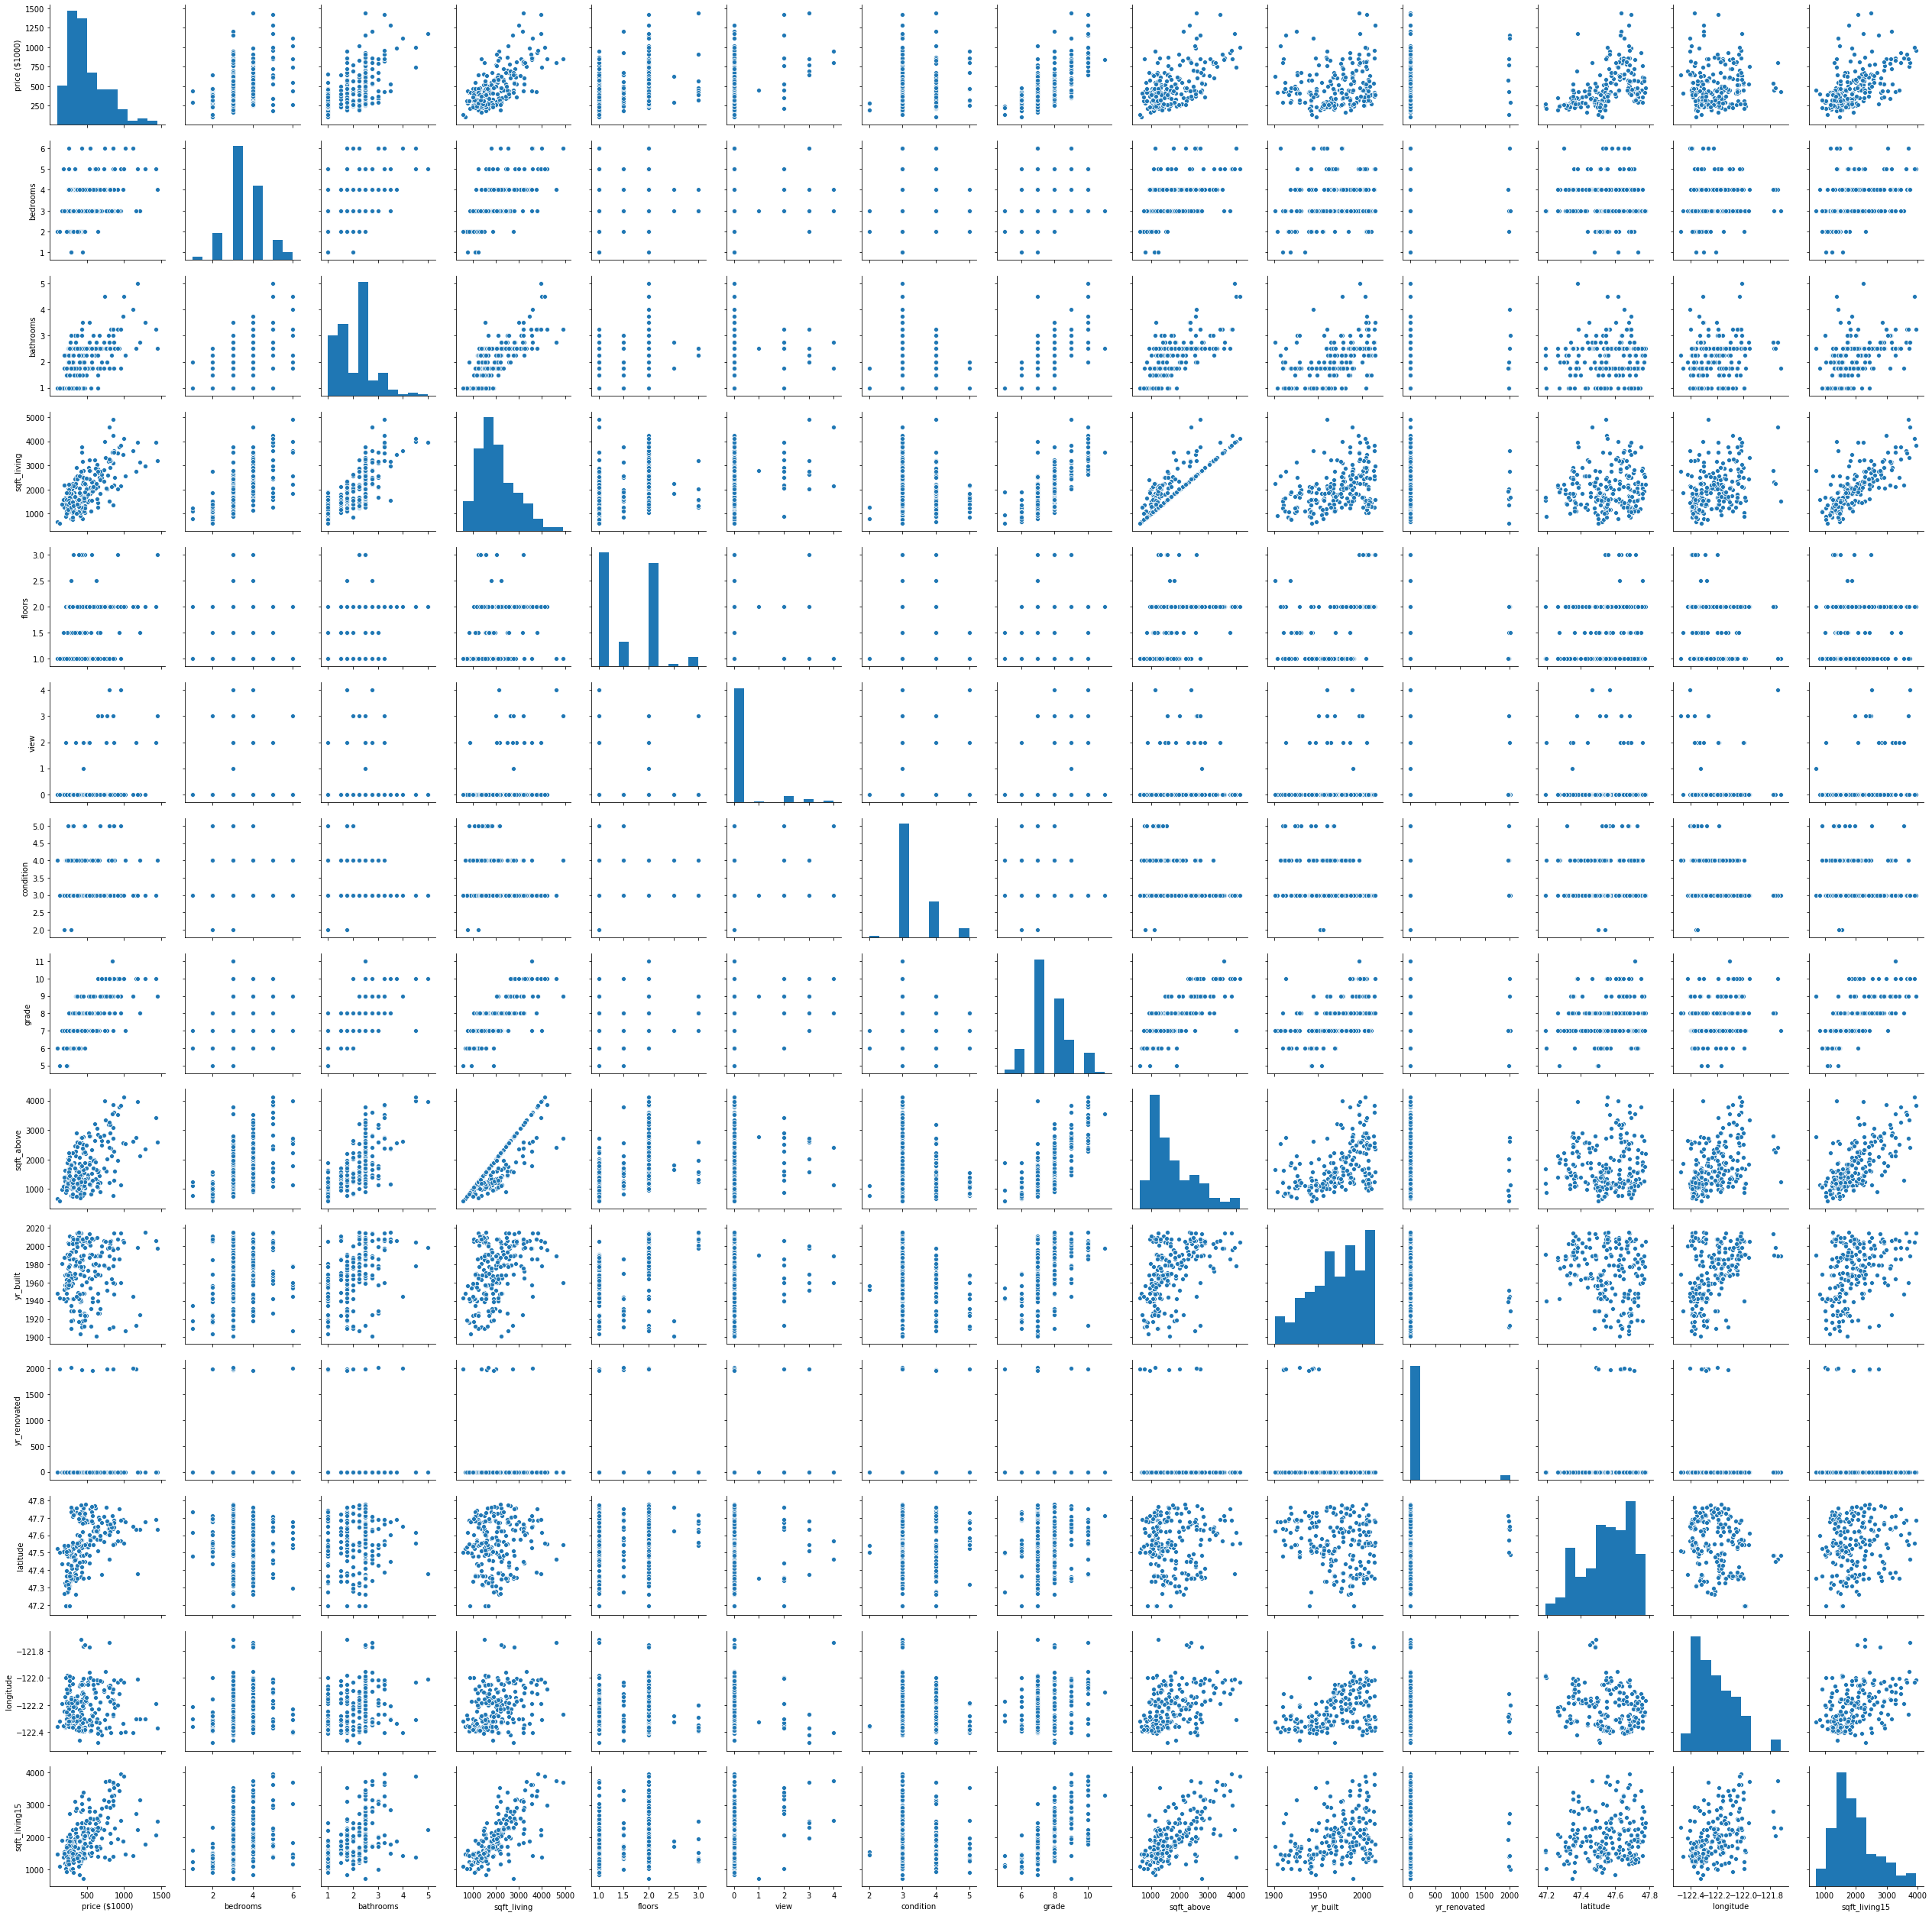

In [10]:
import seaborn as sns

data_scatter = data.drop(['id'], axis=1)

sns.pairplot(data_scatter)

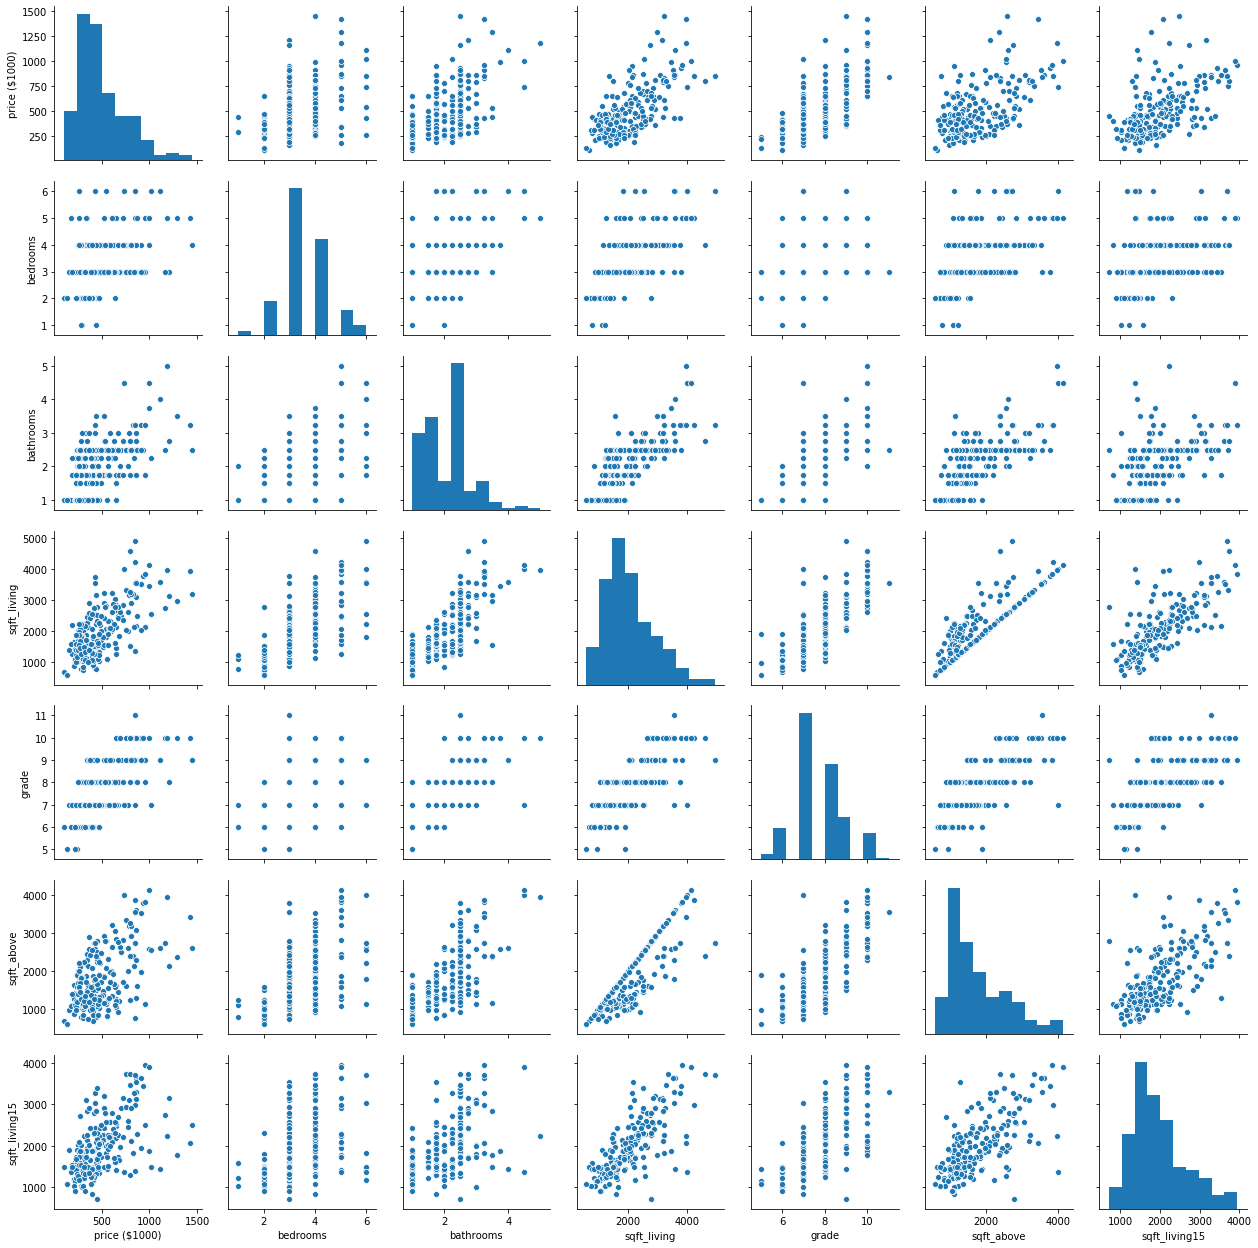

In [11]:
data_scatter2 = data_scatter.drop(['floors', 'view', 'condition', 'yr_renovated', 'yr_built', 'latitude', 'longitude'], axis=1)

sns.pairplot(data_scatter2)

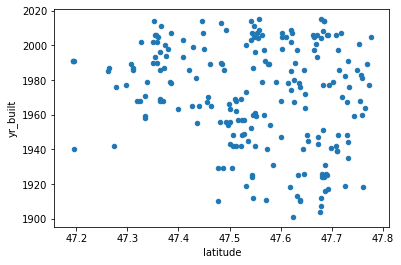

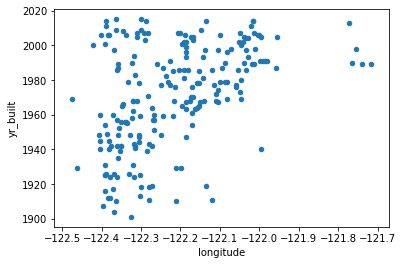

In [12]:
data.plot(kind='scatter', x='latitude', y='yr_built')
data.plot(kind='scatter', x='longitude', y='yr_built')

### 2. Statistical Inference

##### Confidence Interval Evaluation for Mean House Price

In [13]:
from scipy.stats import t

# define probability
p = 0.975
df = 211

# retrieve value <= probability
cr_value = t.ppf(p, df)
print('The t-distribution critical value for alpha = .025 with 211 degrees of freedom is ' + str(cr_value))

The t-distribution critical value for alpha = .025 with 211 degrees of freedom is 1.971270646046835


##### Basement vs. No Basement Analysis

In [14]:
data_y = data

for i, row in pd.DataFrame(data_y).iterrows():
    if row['sqft_living'] <= row['sqft_above']:
        data_y = data_y.drop([i])
        
        
data_n = data

for i, row in pd.DataFrame(data_n).iterrows():
    if row['sqft_living'] > row['sqft_above']:
        data_n = data_n.drop([i])

In [15]:
data_n.describe()

,id,price ($1000),bedrooms,bathrooms,sqft_living,floors,view,condition,grade,sqft_above,yr_built,yr_renovated,latitude,longitude,sqft_living15
count,1.250000e+02,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,4.430872e+09,458.224000,3.336000,2.054000,1963.456000,1.716000,0.120000,3.304000,7.632000,1963.456000,1975.120000,63.568000,47.531838,-122.193128,1964.064000
std,2.810637e+09,223.172466,0.958359,0.754412,830.308401,0.528754,0.517438,0.556834,1.228269,830.308401,30.220854,351.032425,0.152519,0.145000,737.162309
min,6.500021e+07,107.000000,1.000000,1.000000,600.000000,1.000000,0.000000,2.000000,5.000000,600.000000,1904.000000,0.000000,47.195200,-122.461000,720.000000
25%,2.355010e+09,290.000000,3.000000,1.500000,1260.000000,1.000000,0.000000,3.000000,7.000000,1260.000000,1956.000000,0.000000,47.380000,-122.317000,1410.000000
50%,3.584000e+09,400.000000,3.000000,2.250000,1850.000000,2.000000,0.000000,3.000000,7.000000,1850.000000,1985.000000,0.000000,47.543900,-122.186000,1800.000000
75%,7.203220e+09,550.000000,4.000000,2.500000,2560.000000,2.000000,0.000000,4.000000,8.000000,2560.000000,2000.000000,0.000000,47.677200,-122.081000,2424.000000
max,9.828702e+09,1180.000000,6.000000,5.000000,4130.000000,3.000000,3.000000,5.000000,11.000000,4130.000000,2015.000000,1992.000000,47.776100,-121.756000,3950.000000


In [16]:
data_y.describe()

,id,price ($1000),bedrooms,bathrooms,sqft_living,floors,view,condition,grade,sqft_above,yr_built,yr_renovated,latitude,longitude,sqft_living15
count,8.700000e+01,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,4.631541e+09,549.862069,3.551724,2.132184,2164.367816,1.298851,0.333333,3.367816,7.666667,1478.275862,1965.413793,91.609195,47.573536,-122.249759,1990.068966
std,2.699618e+09,274.445452,0.937074,0.747903,815.467766,0.496849,0.923425,0.649059,0.948275,595.538074,28.353890,419.738217,0.119546,0.143259,614.284189
min,2.585001e+08,165.000000,2.000000,1.000000,1000.000000,1.000000,0.000000,2.000000,6.000000,690.000000,1901.000000,0.000000,47.193800,-122.474000,830.000000
25%,2.360095e+09,364.000000,3.000000,1.750000,1585.000000,1.000000,0.000000,3.000000,7.000000,1105.000000,1946.000000,0.000000,47.511050,-122.355000,1540.000000
50%,4.178500e+09,468.000000,3.000000,2.000000,2020.000000,1.000000,0.000000,3.000000,7.000000,1290.000000,1965.000000,0.000000,47.572600,-122.299000,1820.000000
75%,6.825205e+09,661.500000,4.000000,2.625000,2465.000000,1.500000,0.000000,4.000000,8.000000,1680.000000,1987.000000,0.000000,47.668200,-122.184500,2290.000000
max,9.828702e+09,1445.000000,6.000000,4.000000,4920.000000,3.000000,4.000000,5.000000,10.000000,3860.000000,2015.000000,2012.000000,47.772800,-121.716000,3740.000000


In [17]:
# define probability
p = 0.95
df = 159

# retrieve value <= probability
cr_value = t.ppf(p, df)
print('The t-distribution critical value for alpha = .05 with 159 degrees of freedom is ' + str(cr_value))

The t-distribution critical value for alpha = .05 with 159 degrees of freedom is 1.6544935026291934


In [18]:
# define probability
p = 0.975
df = 159

# retrieve value <= probability
cr_value = t.ppf(p, df)
print('The t-distribution critical value for alpha = .05 with 159 degrees of freedom is ' + str(cr_value))

The t-distribution critical value for alpha = .05 with 159 degrees of freedom is 1.9749962127602252


In [19]:
box_data = pd.concat([data_y['price ($1000)'], data_n['price ($1000)']], axis=1, sort=False)
box_data.columns = ['Basement', 'No Basement']
box_data = 1000*box_data

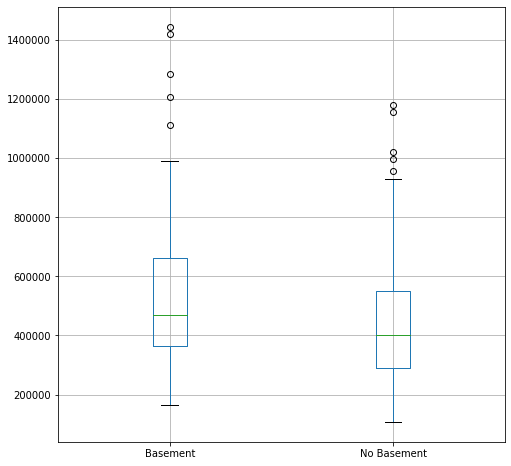

In [20]:
#box-and-whisker plot of the price variable, without basement
boxplot = box_data.boxplot(column=['Basement', 'No Basement'], figsize=(8,8))

### 3. Simple Linear Regression

##### Simple Linear Regression Model

In [166]:
from sklearn.linear_model import LinearRegression

X = data['sqft_living'].values.reshape(-1, 1)  # values converts it into a numpy array
y = data['price ($1000)'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, y)  # perform linear regression

y_pred = linear_regressor.predict(X)  # make predictions

##### Diagnostic Plots

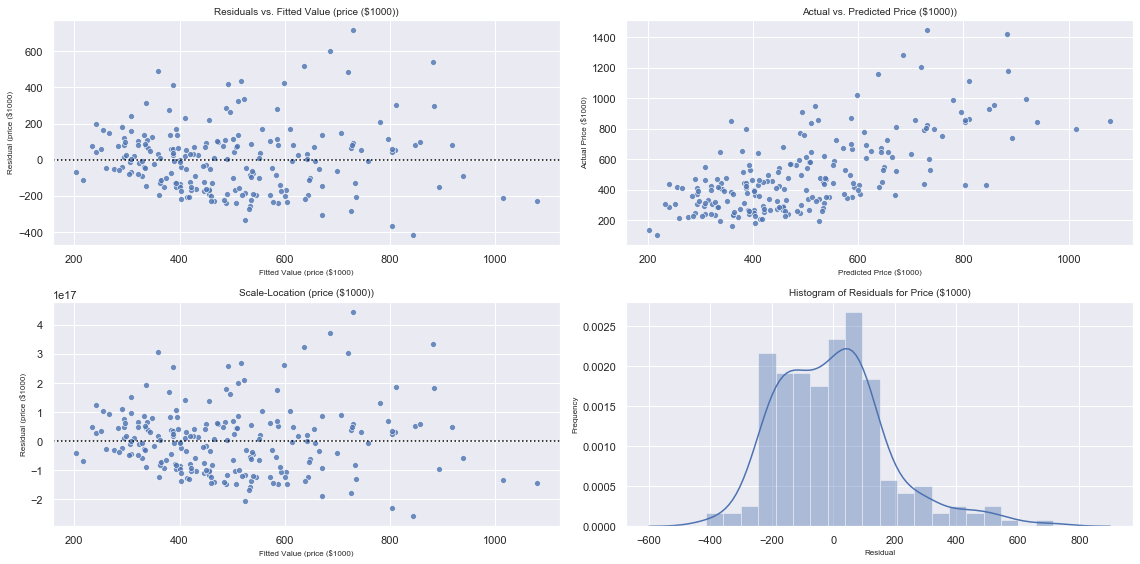

In [176]:
res_slr = y - y_pred
res_slr = res_slr.ravel()

fits_slr = y_pred.ravel()

# Residual vs Fitted
fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(221)

ax = sns.scatterplot(fits_slr, res_slr, alpha=.8)

ax.axhline(0, ls=':', color='black')
ax.set_title('Residuals vs. Fitted Value (price ($1000))', size = 10)
ax.set_xlabel('Fitted Value (price ($1000)', size = 8)
ax.set_ylabel('Residual (price ($1000)', size= 8)

# Actual vs. Predicted
ax2 = fig.add_subplot(222)


ax2 = sns.scatterplot(y_pred.ravel(), y.ravel(), alpha=.8)

ax2.set_title('Actual vs. Predicted Price ($1000))', size = 10)
ax2.set_xlabel('Predicted Price ($1000)', size = 8)
ax2.set_ylabel('Actual Price ($1000)', size= 8)

# Residual Histogram
ax3 = fig.add_subplot(224)

ax3 = sns.distplot(res_slr, bins=20)    

ax3.set_title('Histogram of Residuals for Price ($1000)', size = 10)
ax3.set_xlabel('Residual', size = 8)
ax3.set_ylabel('Frequency', size= 8)

# Scale-Location
res_slr = y - y_pred
res_slr = res_slr.ravel()
res_slr_mean = np.mean(res_slr)
res_slr_std = np.mean(res_slr)

st_res_slr = (res_slr - res_slr_mean)/res_slr_std

fits_slr = y_pred.ravel()

ax4 = fig.add_subplot(223)

ax4 = sns.scatterplot(fits_slr, st_res_slr, alpha=.8)

ax4.axhline(0, ls=':', color='black')
ax4.set_title('Scale-Location (price ($1000))', size = 10)
ax4.set_xlabel('Fitted Value (price ($1000)', size = 8)
ax4.set_ylabel('Residual (price ($1000)', size= 8)

plt.tight_layout()
plt.show()

##### Linear Model

In [21]:
from sklearn.linear_model import LinearRegression

X = data['sqft_living'].values.reshape(-1, 1)  # values converts it into a numpy array
y = data['price ($1000)'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, y)  # perform linear regression

y_pred = linear_regressor.predict(X)  # make predictions

In [22]:
# calculations for predicting price given sqft_living = 2000
print('The y-intercept is: ', linear_regressor.intercept_[0])
print('The slope is: ', linear_regressor.coef_[0][0])

pred_2000 = linear_regressor.predict([[2000]])

print('The predicted price ($1000) for a 2000 square foot house is: ', pred_2000[0])

The y-intercept is:  80.79449149305213
The slope is:  0.2028616007199675
The predicted price ($1000) for a 2000 square foot house is:  [486.51769293]


In [23]:
X1 = X.reshape(1,-1)
X1 = X1.ravel()
y1 = y.ravel()

Text(0, 0.5, 'Residual')

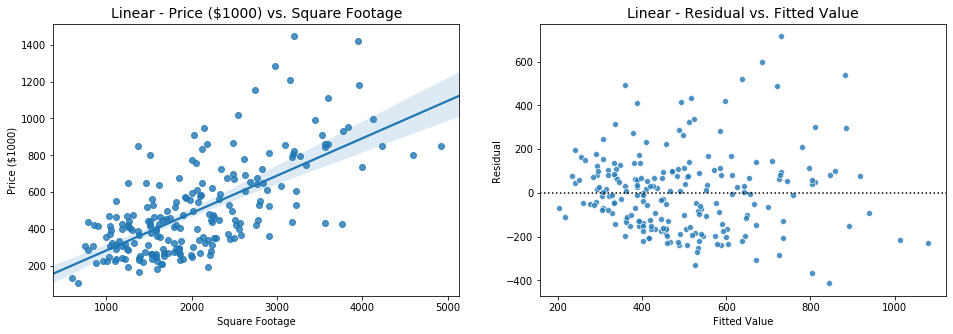

In [24]:
res1 = y - y_pred
res1 = res1.ravel()

fits1 = y_pred.ravel()


fig = plt.figure(figsize=(16,5))

ax = fig.add_subplot(121)

ax = sns.regplot(X1,y1)

ax.set_title('Linear - Price ($1000) vs. Square Footage', size = 14)
ax.set_xlabel('Square Footage', size = 10)
ax.set_ylabel('Price ($1000)', size= 10)

ax2 = fig.add_subplot(122)

ax2 = sns.scatterplot(fits1, res1, alpha=.8)

ax2.axhline(0, ls=':', color='black')
ax2.set_title('Linear - Residual vs. Fitted Value', size = 14)
ax2.set_xlabel('Fitted Value', size = 10)
ax2.set_ylabel('Residual', size= 10)

##### Quadratic Fit Model

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

quad = make_pipeline(PolynomialFeatures(2), LinearRegression())
quad.fit(X, y)

quad_pred = quad.predict(X)

Text(0, 0.5, 'Residual')

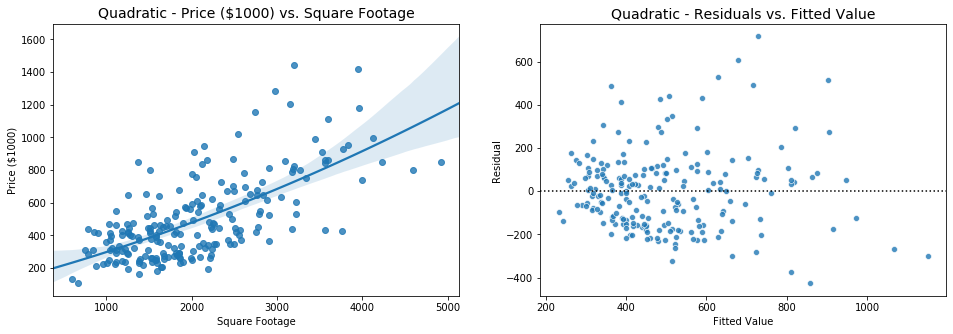

In [26]:
res2 = y - quad_pred
res2 = res2.ravel()

fits2 = quad_pred.ravel()


fig = plt.figure(figsize=(16,5))

ax = fig.add_subplot(121)

ax = sns.regplot(X1,y1, order=2)

ax.set_title('Quadratic - Price ($1000) vs. Square Footage', size = 14)
ax.set_xlabel('Square Footage', size = 10)
ax.set_ylabel('Price ($1000)', size= 10)

ax2 = fig.add_subplot(122)

ax2 = sns.scatterplot(fits2, res2, alpha=.8)

ax2.axhline(0, ls=':', color='black')
ax2.set_title('Quadratic - Residuals vs. Fitted Value', size = 14)
ax2.set_xlabel('Fitted Value', size = 10)
ax2.set_ylabel('Residual', size= 10)

##### Linear Model - Logarithmic Transform on Price

In [27]:
from sklearn.linear_model import LinearRegression

X = data['sqft_living'].values.reshape(-1, 1)  # values converts it into a numpy array
y = data['price ($1000)'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

y_log = np.log(y)

log = LinearRegression()  # create object for the class
log.fit(X, y_log)  # perform linear regression

y_log_pred = log.predict(X)  # make predictions

In [29]:
from regressors import stats
stats.coef_pval(log, X, y)[1]

0.982279219686675

Text(0, 0.5, 'Residual')

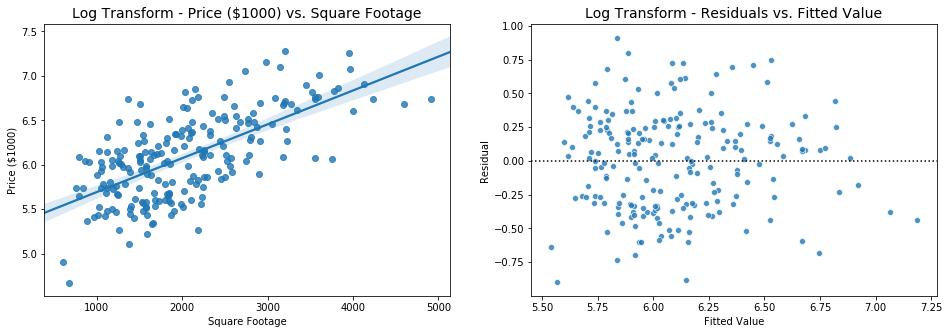

In [30]:
y_log1 = np.log(y1)

res3 = y_log - y_log_pred
res3 = res3.ravel()

fits3 = y_log_pred.ravel()

fig = plt.figure(figsize=(16,5))

ax = fig.add_subplot(121)

ax = sns.regplot(X1,y_log1)

ax.set_title('Log Transform - Price ($1000) vs. Square Footage', size = 14)
ax.set_xlabel('Square Footage', size = 10)
ax.set_ylabel('Price ($1000)', size= 10)

ax2 = fig.add_subplot(122)

ax2 = sns.scatterplot(fits3, res3, alpha=.8)

ax2.axhline(0, ls=':', color='black')
ax2.set_title('Log Transform - Residuals vs. Fitted Value', size = 14)
ax2.set_xlabel('Fitted Value', size = 10)
ax2.set_ylabel('Residual', size= 10)

##### Metrics

In [31]:
from sklearn.metrics import r2_score, mean_squared_error

# Coefficient of Determination Calculation
cod1 = r2_score(y, y_pred)
cod2 = r2_score(y, quad_pred)
cod3 = r2_score(y_log, y_log_pred)

# Root Mean Squared Error Calculation
rmse1 = np.sqrt(mean_squared_error(y, y_pred))
rmse2 = np.sqrt(mean_squared_error(y, quad_pred))
rmse3 = np.sqrt(mean_squared_error(y_log, y_log_pred))

# Adjusted Coefficient of Determination Calculation
radj1 = 1-(1-cod1)*(211)/(210)
radj2 = 1-(1-cod2)*(211)/(210)
radj3 = 1-(1-cod3)*(211)/(210)

# Mean Absolute Percentile Error Calculation
ape1 = (np.absolute(y-y_pred)/y).ravel()
ape2 = (np.absolute(y-quad_pred)/y).ravel()
ape3 = (np.absolute(y_log-y_log_pred)/y_log).ravel()

count1 = 0
count2 = 0
count3 = 0

for i in range (0,212):
    count1 = count1 + ape1[i]

for i in range (0,212):
    count2 = count2 + ape2[i]
    
for i in range (0,212):
    count3 = count3 + ape3[i]

mape1 = count1/212
mape2 = count2/212
mape3 = count3/212

# Put dataframe together
scores = {'RMSE':[rmse1,rmse2,rmse3],
          'MAPE':[mape1,mape2,mape3],
          'R2':[cod1,cod2,cod3],
          'R2_adj':[radj1,radj2,radj3]}

metrics = pd.DataFrame(scores, index=['Linear Model',
                                      'Quadratic Fit Model',
                                      'Logistic Transform Model'])
metrics

,RMSE,MAPE,R2,R2_adj
Linear Model,183.358588,0.332961,0.455260,0.452666
Quadratic Fit Model,183.000241,0.330846,0.457387,0.454803
Logistic Transform Model,0.357463,0.049296,0.436105,0.433420


##### Linear Regression Model - Other Variables

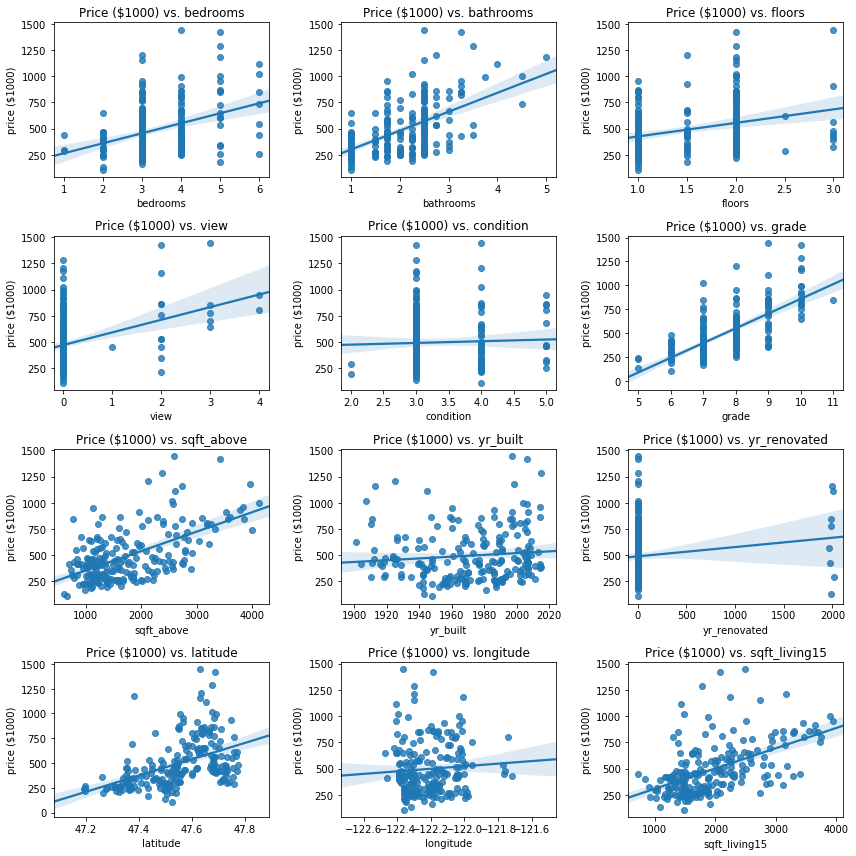

In [32]:
# Linear Regression Model Fit Lines
fig = plt.figure(figsize=(12,12))
col_names = np.delete(data.columns, 4)


for i in range (2, 14):
    var = col_names[i]
    
    X_var = data[var].values.reshape(-1, 1)
    X1_var = X_var.reshape(1,-1)
    X1_var = X1_var.ravel()

    ax = fig.add_subplot(4, 3, i-1)
    
    ax = sns.regplot(X1_var, y1)
    
    #title = 'Price ($1000) vs. ' + str(var).capitalize()
    
    ax.set_title('Price ($1000) vs. ' + str(var), size = 12)
    ax.set_xlabel(str(var), size = 10)
    ax.set_ylabel('price ($1000)', size= 10)
    
plt.tight_layout()
plt.show()

In [33]:
# Slope Coefficients and Corresponding P-Values
from sklearn.linear_model import LinearRegression
from regressors import stats

p_vals = np.zeros(13)
coef_vals = np.zeros(13)
col_names = np.delete(data.columns, [0,1])

for i in range (0,13):
    var = col_names[i]
    
    X_var = data[var].values.reshape(-1, 1)
    y_var = data['price ($1000)'].values.reshape(-1, 1)
    
    model = LinearRegression()
    model.fit(X_var, y_var)
    
    p_val = stats.coef_pval(model, X_var, y_var)[1]
    coef_val = model.coef_[0][0]
    
    p_vals[i] = p_vals[i] + p_val
    coef_vals[i] = coef_vals[i] + coef_val
    
p_values = pd.DataFrame({'Variable':col_names,
                         'Slope Coefficient':np.around(coef_vals, 2),
                         'P-Value':np.around(p_vals,4)}).set_index('Variable')
p_values.index.name = None
p_values

,Slope Coefficient,P-Value
bedrooms,95.47,0.0000
bathrooms,180.63,0.0000
sqft_living,0.20,0.0000
floors,129.22,0.0000
view,120.45,0.0000
condition,16.26,0.1906
grade,154.17,0.0000
sqft_above,0.19,0.0000
yr_built,0.84,0.0000
yr_renovated,0.09,0.0435


### 4. Multiple Linear Regression

##### MLR Model

In [34]:
from sklearn.linear_model import LinearRegression

X_mlr = data.drop(['id', 'price ($1000)'], axis=1)
y_mlr = data['price ($1000)']

mlr = LinearRegression()  # create object for the class
mlr.fit(X_mlr, y_mlr)  # perform linear regression

y_pred_mlr = mlr.predict(X_mlr)  # make predictions

##### Summary Statistics

In [35]:
# Mean Absolute Percentile Error Calculation
ape_mlr = (np.absolute(y_mlr-y_pred_mlr)/y_mlr).ravel()
count_mlr = 0

for i in range (0,212):
    count_mlr = count_mlr + ape_mlr[i]

mape_mlr = count_mlr/212

# Root Mean Squared Error Calculation
rmse_mlr = np.sqrt(mean_squared_error(y_mlr, y_pred_mlr))

print('RMSE: ', rmse_mlr)
print('MAPE: ', mape_mlr)

RMSE:  119.91876349590449
MAPE:  0.20113707731954228


In [36]:
from regressors import stats

# Print summary table:
print("\n========================= SUMMARY =========================")
variable = X_mlr.columns
stats.summary(mlr, X_mlr, y_mlr, variable)


========================= SUMMARY =========================
Residuals:
     Min       1Q    Median        3Q        Max
 53.9314  334.849  472.1206  635.0334  1098.7871


Coefficients:
                   Estimate   Std. Error  t value   p value
_intercept    -19742.188213  9497.098454  -2.0788  0.038848
bedrooms          13.409008    11.676583   1.1484  0.252117
bathrooms         61.871120    20.515548   3.0158  0.002877
sqft_living        0.042339     0.018632   2.2724  0.024072
floors            17.739773    21.411955   0.8285  0.408324
view              62.513922    13.427477   4.6557  0.000006
condition         45.557019    15.433232   2.9519  0.003516
grade            101.837776    13.378191   7.6122  0.000000
sqft_above         0.027649     0.018266   1.5136  0.131612
yr_built          -1.813369     0.035941 -50.4535  0.000000
yr_renovated       0.029580     0.021745   1.3603  0.175190
latitude         656.648726    62.254458  10.5478  0.000000
longitude         70.540058    15.

##### Diagnostic Plots

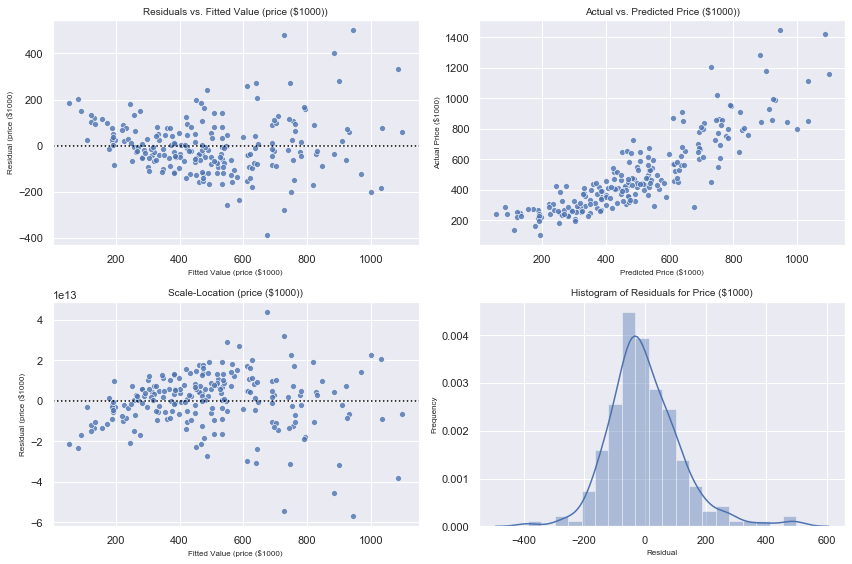

In [178]:
res_mlr = y_mlr - y_pred_mlr
res_mlr = res_mlr.ravel()

fits_mlr = y_pred_mlr.ravel()

# Residual vs Fitted
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(221)

ax = sns.scatterplot(fits_mlr, res_mlr, alpha=.8)

ax.axhline(0, ls=':', color='black')
ax.set_title('Residuals vs. Fitted Value (price ($1000))', size = 10)
ax.set_xlabel('Fitted Value (price ($1000)', size = 8)
ax.set_ylabel('Residual (price ($1000)', size= 8)

# Actual vs. Predicted
ax2 = fig.add_subplot(222)

ax2 = sns.scatterplot(y_pred_mlr, y_mlr, alpha=.8)

ax2.set_title('Actual vs. Predicted Price ($1000))', size = 10)
ax2.set_xlabel('Predicted Price ($1000)', size = 8)
ax2.set_ylabel('Actual Price ($1000)', size= 8)

# Residual Histogram
ax3 = fig.add_subplot(224)
    
#ax.hist(res_mlr, bins = 20,
#             color = 'blue', edgecolor = 'black')

ax3 = sns.distplot(res_mlr, bins=20)    

ax3.set_title('Histogram of Residuals for Price ($1000)', size = 10)
ax3.set_xlabel('Residual', size = 8)
ax3.set_ylabel('Frequency', size= 8)

# Scale-Location
res_mlr = y_mlr - y_pred_mlr
res_mlr = res_mlr.ravel()
res_mlr_mean = np.mean(res_mlr)
res_mlr_std = np.mean(res_mlr)

st_res_mlr = (res_mlr - res_mlr_mean)/res_mlr_std

fits_mlr = y_pred_mlr.ravel()

ax4 = fig.add_subplot(223)

ax4 = sns.scatterplot(fits_mlr, st_res_mlr, alpha=.8)

ax4.axhline(0, ls=':', color='black')
ax4.set_title('Scale-Location (price ($1000))', size = 10)
ax4.set_xlabel('Fitted Value (price ($1000)', size = 8)
ax4.set_ylabel('Residual (price ($1000)', size= 8)

plt.tight_layout()
plt.show()

##### SLR and MLR Slope Coefficient Comparison

In [38]:
coefs_comp = pd.DataFrame({'Variable':col_names,
                           'SLR Slope Coefficient':np.around(coef_vals, 2),
                           'MLR Slope Coefficient':np.around(mlr.coef_, 2)})

coefs_comp_zoom = coefs_comp.drop([0, 1, 3, 4, 5, 6, 10, 11])

coefs_comp

,Variable,SLR Slope Coefficient,MLR Slope Coefficient
0,bedrooms,95.47,13.41
1,bathrooms,180.63,61.87
2,sqft_living,0.20,0.04
3,floors,129.22,17.74
4,view,120.45,62.51
5,condition,16.26,45.56
6,grade,154.17,101.84
7,sqft_above,0.19,0.03
8,yr_built,0.84,-1.81
9,yr_renovated,0.09,0.03


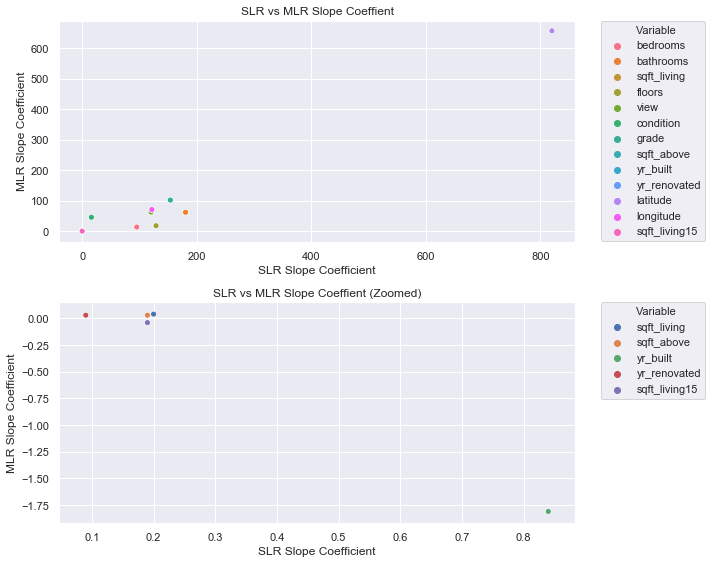

In [39]:
fig = plt.figure(figsize=(10,8))
sns.set(style="darkgrid")

ax = fig.add_subplot(211)
ax = sns.scatterplot(data = coefs_comp, x='SLR Slope Coefficient', y='MLR Slope Coefficient', hue='Variable')
ax.set_title('SLR vs MLR Slope Coeffient')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax2 = fig.add_subplot(212)
ax2 = sns.scatterplot(data = coefs_comp_zoom, x='SLR Slope Coefficient', y='MLR Slope Coefficient', hue='Variable')
ax2.set_title('SLR vs MLR Slope Coeffient (Zoomed)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.show()

##### Finding Important Interactions

In [40]:
data_inter = data.drop(['id', 'price ($1000)'], axis=1)

for i in range (0, 13):
    for j in range (0, 13):
        if i < j:
            name = data_inter.columns[i] + '*' + data_inter.columns[j]
            data_inter[name] = data_inter[data_inter.columns[i]]*data_inter[data_inter.columns[j]]

In [41]:
from sklearn.linear_model import LinearRegression

r2adj_scores = np.zeros(91)
rmse_inter_scores = np.zeros(91)

for i in range (13,91):
    data1 = data.drop(['id', 'price ($1000)'], axis=1)
    
    name = str(data_inter.columns[i])
    
    data1[name] = data_inter[name]
    
    X_inter = data1
    y_inter = data['price ($1000)']
    
    mlr_inter = LinearRegression()
    mlr_inter.fit(X_inter, y_inter)
    
    y_pred_inter = mlr_inter.predict(X_inter)
    
    r2 = r2_score(y_inter, y_pred_inter)
    rmse_inter = np.sqrt(mean_squared_error(y_inter, y_pred_inter))
    
    r2_adj = 1-(1-r2)*(211)/(197)
    
    r2adj_scores[i] = r2adj_scores[i] + r2_adj
    rmse_inter_scores[i] = rmse_inter_scores[i] + rmse_inter

inter_metrics = pd.DataFrame({'Interaction':data_inter.columns,
                              'R2 Adj':r2adj_scores,
                              'RMSE':rmse_inter_scores})

inter_metrics = inter_metrics[inter_metrics['R2 Adj'] > .77]
inter_metrics = inter_metrics[inter_metrics['RMSE'] < 119]

inter_metrics

,Interaction,R2 Adj,RMSE
26,bathrooms*floors,0.777109,113.330013
29,bathrooms*grade,0.771990,114.623911
36,sqft_living*floors,0.783212,111.767691
48,floors*grade,0.774354,114.028288
49,floors*sqft_above,0.773127,114.337781


##### MLR with Relevant Interactions

In [42]:
data_inc_inter = data
data_inc_inter['bathrooms*floors'] = data_inter['bathrooms*floors']
data_inc_inter['bathrooms*grade'] = data_inter['bathrooms*grade']
data_inc_inter['sqft_living*floors'] = data_inter['sqft_living*floors']
data_inc_inter['floors*grade'] = data_inter['floors*grade']
data_inc_inter['floors*sqft_above'] = data_inter['floors*sqft_above']

from sklearn.linear_model import LinearRegression

X_inter = data_inc_inter.drop(['id', 'price ($1000)'], axis=1)
y_inter = data_inc_inter['price ($1000)']

inter = LinearRegression()  # create object for the class
inter.fit(X_inter, y_inter)  # perform linear regression

y_pred_inter = inter.predict(X_inter)  # make predictions

# Mean Absolute Percentile Error Calculation
ape_inter = (np.absolute(y_inter-y_pred_inter)/y_inter).ravel()
count_inter = 0

for i in range (0,212):
    count_inter = count_inter + ape_inter[i]

mape_inter = count_inter/212

# Root Mean Squared Error Calculation
rmse_inter = np.sqrt(mean_squared_error(y_inter, y_pred_inter))

print('The RMSE of the MLR Model with relevant interactions is: ', rmse_inter)
print('The MAPE of the MLR Model with relevant interactions is: ', mape_inter)


# Print summary table:
print("\n============================ SUMMARY ============================")
variable = X_inter.columns
stats.summary(inter, X_inter, y_inter, variable)

The RMSE of the MLR Model with relevant interactions is:  108.95633461123947
The MAPE of the MLR Model with relevant interactions is:  0.19662146426221963

============================ SUMMARY ============================
Residuals:
     Min        1Q    Median        3Q        Max
 68.5709  344.4643  455.1361  627.5059  1196.2303


Coefficients:
                        Estimate   Std. Error  t value   p value
_intercept         -16555.051116  8768.767296  -1.8880  0.060404
bedrooms               22.359089    10.674987   2.0945  0.037406
bathrooms            -146.073616    78.305335  -1.8654  0.063508
sqft_living            -0.083764     0.042824  -1.9560  0.051782
floors               -323.443680   158.861036  -2.0360  0.042998
view                   70.268657    12.343528   5.6928  0.000000
condition              49.450083    14.128041   3.5001  0.000567
grade                  19.186530    30.997503   0.6190  0.536604
sqft_above              0.009748     0.061134   0.1595  0.873464
y

##### MLR with Relevant Interactions and a Logarithmic Transform on the Response 

In [43]:
from sklearn.linear_model import LinearRegression

X_inter = data_inc_inter.drop(['id', 'price ($1000)'], axis=1)
y_inter = np.log(data_inc_inter['price ($1000)'])

inter = LinearRegression()  # create object for the class
inter.fit(X_inter, y_inter)  # perform linear regression

y_pred_inter = inter.predict(X_inter)  # make predictions

# Mean Absolute Percentile Error Calculation
ape_inter = (np.absolute(y_inter-y_pred_inter)/y_inter).ravel()
count_inter = 0

for i in range (0,212):
    count_inter = count_inter + ape_inter[i]

mape_inter = count_inter/212

# Adjusted R^2
r2_adj = radj1 = 1-(1-(r2_score(y_inter, y_pred_inter)))*(211)/(197)

print('The Adjusted R^2 of the MLR Model with relevant interactions is: ', r2_adj)
print('The MAPE of the MLR Model with relevant interactions is: ', mape_inter)

The Adjusted R^2 of the MLR Model with relevant interactions is:  0.7949114245004205
The MAPE of the MLR Model with relevant interactions is:  0.025842064228998613


##### MLR with Relevant Interactions and a Square Root Transform of the Response

In [44]:
from sklearn.linear_model import LinearRegression

X_inter = data_inc_inter.drop(['id', 'price ($1000)'], axis=1)
y_inter = np.sqrt(data_inc_inter['price ($1000)'])

inter = LinearRegression()  # create object for the class
inter.fit(X_inter, y_inter)  # perform linear regression

y_pred_inter = inter.predict(X_inter)  # make predictions

# Mean Absolute Percentile Error Calculation
ape_inter = (np.absolute(y_inter-y_pred_inter)/y_inter).ravel()
count_inter = 0

for i in range (0,212):
    count_inter = count_inter + ape_inter[i]

mape_inter = count_inter/212

# Adjusted R^2
r2_adj = radj1 = 1-(1-(r2_score(y_inter, y_pred_inter)))*(211)/(197)

print('The Adjusted R^2 of the MLR Model with relevant interactions is: ', r2_adj)
print('The MAPE of the MLR Model with relevant interactions is: ', mape_inter)

The Adjusted R^2 of the MLR Model with relevant interactions is:  0.8061245677926824
The MAPE of the MLR Model with relevant interactions is:  0.0825988902553605


##### MLR with Relevant Interactions and a Quadratic Transform of the Response

In [45]:
from sklearn.linear_model import LinearRegression

X_inter = data_inc_inter.drop(['id', 'price ($1000)'], axis=1)
y_inter = np.square(data_inc_inter['price ($1000)'])

inter = LinearRegression()  # create object for the class
inter.fit(X_inter, y_inter)  # perform linear regression

y_pred_inter = inter.predict(X_inter)  # make predictions

# Mean Absolute Percentile Error Calculation
ape_inter = (np.absolute(y_inter-y_pred_inter)/y_inter).ravel()
count_inter = 0

for i in range (0,212):
    count_inter = count_inter + ape_inter[i]

mape_inter = count_inter/212

# Adjusted R^2
r2_adj = radj1 = 1-(1-(r2_score(y_inter, y_pred_inter)))*(211)/(197)

print('The Adjusted R^2 of the MLR Model with relevant interactions is: ', r2_adj)
print('The MAPE of the MLR Model with relevant interactions is: ', mape_inter)

The Adjusted R^2 of the MLR Model with relevant interactions is:  0.7247413269713426
The MAPE of the MLR Model with relevant interactions is:  0.728506867806065


##### Finding the Best/Simplified MLR Model

In [46]:
# MLR Model with Relevant Interactions and Logarithmic Transform of Response Variable - EXCLUDING variables w/ coefficient p-values > .05 in the Original MLR Model w/ Relevant Interactions
from sklearn.linear_model import LinearRegression

X_inter = data_inc_inter.drop(['id', 'price ($1000)', 'bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'yr_renovated', 'bathrooms*floors', 'floors*sqft_above'], axis=1)
y_inter = np.log(data_inc_inter['price ($1000)'])

inter = LinearRegression()  # create object for the class
inter.fit(X_inter, y_inter)  # perform linear regression

y_pred_inter = inter.predict(X_inter)  # make predictions

# Print summary table:
print("\n========================== SUMMARY ==========================")
variable = X_inter.columns
stats.summary(inter, X_inter, y_inter, variable)


========================== SUMMARY ==========================
Residuals:
    Min      1Q  Median      3Q     Max
-0.5756 -0.1274  0.0029  0.1138  0.9633


Coefficients:
                     Estimate  Std. Error  t value   p value
_intercept         -25.923677   15.658468  -1.6556  0.099296
bedrooms             0.036093    0.019815   1.8215  0.069946
floors              -0.590162    0.105602  -5.5885  0.000000
view                 0.116462    0.021313   5.4645  0.000000
condition            0.086284    0.027232   3.1685  0.001760
yr_built            -0.003613    0.000056 -64.8660  0.000000
latitude             1.522096    0.104901  14.5099  0.000000
longitude            0.279368    0.025925  10.7759  0.000000
bathrooms*grade      0.020220    0.003690   5.4792  0.000000
sqft_living*floors   0.000026    0.000006   4.4778  0.000012
floors*grade         0.079752    0.007252  10.9967  0.000000
---
R-squared:  0.79930,    Adjusted R-squared:  0.78932
F-statistic: 80.05 on 10 features


In [47]:
# Mean Absolute Percentile Error Calculation
ape_inter = (np.absolute(y_inter-y_pred_inter)/y_inter).ravel()
count_inter = 0

for i in range (0,212):
    count_inter = count_inter + ape_inter[i]

mape_inter = count_inter/212

# Adjusted R^2
rmse_inter = np.sqrt(mean_squared_error(y_inter, y_pred_inter))

print('The RMSE of the MLR Model with relevant interactions is: ', rmse_inter)
print('The MAPE of the MLR Model with relevant interactions is: ', mape_inter)

The RMSE of the MLR Model with relevant interactions is:  0.2132566574036821
The MAPE of the MLR Model with relevant interactions is:  0.02635784226326736


### 5. Classification

##### Variable Creation

In [48]:
# reset the data
data = pd.read_csv('KCHousingPrices.csv')

data.loc[data['yr_built'] < 1980, 'before1980'] = 1
data.loc[data['yr_built'] >= 1980, 'before1980'] = 0
data.drop(['yr_built'], axis=1, inplace=True)
data.head()

,id,price ($1000),bedrooms,bathrooms,sqft_living,floors,view,condition,grade,sqft_above,yr_renovated,latitude,longitude,sqft_living15,before1980
0,7203220400,862,5,2.75,3595,2.0,0,3,9,3595,0,47.6848,-122.016,3625,0.0
1,3261020370,653,3,2.50,2680,1.0,0,4,8,1610,0,47.7028,-122.231,2480,1.0
2,7202340400,517,3,2.50,1480,2.0,0,3,7,1480,0,47.6794,-122.034,2250,0.0
3,3021059276,250,4,2.00,2010,1.0,0,4,7,2010,0,47.2785,-122.213,2010,1.0
4,3291800710,338,4,3.00,2090,1.0,0,3,7,1370,0,47.4888,-122.182,1810,0.0


In [49]:
pre1980 = data[data['before1980'] == 1]
post1980 = data[data['before1980'] == 0]

##### Data Exploration

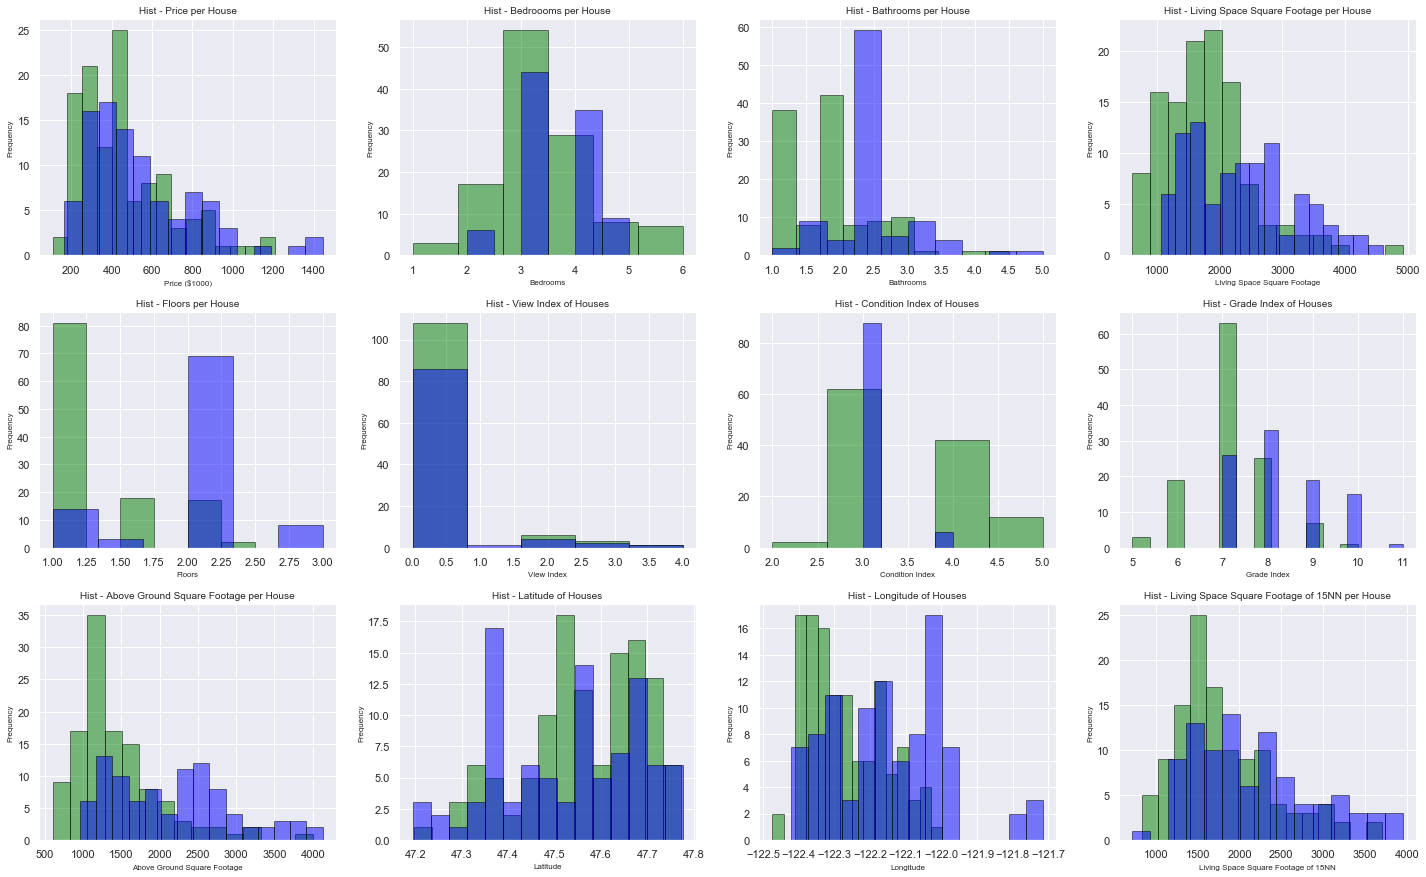

In [50]:
fig = plt.figure(figsize=(20,16))

# price subplot
ax = fig.add_subplot(4, 4, 1)
    
ax.hist(pre1980['price ($1000)'], bins = 15,
             color = 'green', edgecolor = 'black', alpha=.5)

ax.hist(post1980['price ($1000)'], bins = 15,
             color = 'blue', edgecolor = 'black', alpha=.5)
    
ax.set_title('Hist - Price per House', size = 10)
ax.set_xlabel('Price ($1000)', size = 8)
ax.set_ylabel('Frequency', size= 8)

# bedrooms subplot
ax = fig.add_subplot(4, 4, 2)
    
ax.hist(pre1980['bedrooms'], bins = 6,
             color = 'green', edgecolor = 'black', alpha=.5)

ax.hist(post1980['bedrooms'], bins = 6,
             color = 'blue', edgecolor = 'black', alpha=.5)
    
ax.set_title('Hist - Bedroooms per House', size = 10)
ax.set_xlabel('Bedrooms', size = 8)
ax.set_ylabel('Frequency', size= 8)

# bathrooms subplot
ax = fig.add_subplot(4, 4, 3)
    
ax.hist(pre1980['bathrooms'], bins = 10,
             color = 'green', edgecolor = 'black', alpha=.5)

ax.hist(post1980['bathrooms'], bins = 10,
             color = 'blue', edgecolor = 'black', alpha=.5)
    
ax.set_title('Hist - Bathrooms per House', size = 10)
ax.set_xlabel('Bathrooms', size = 8)
ax.set_ylabel('Frequency', size= 8)

# sqft_living subplot
ax = fig.add_subplot(4, 4, 4)
    
ax.hist(pre1980['sqft_living'], bins = 15,
             color = 'green', edgecolor = 'black', alpha=.5)

ax.hist(post1980['sqft_living'], bins = 15,
             color = 'blue', edgecolor = 'black', alpha=.5)
    
ax.set_title('Hist - Living Space Square Footage per House', size = 10)
ax.set_xlabel('Living Space Square Footage', size = 8)
ax.set_ylabel('Frequency', size= 8)

# floors subplot
ax = fig.add_subplot(4, 4, 5)
    
ax.hist(pre1980['floors'], bins = 6,
             color = 'green', edgecolor = 'black', alpha=.5)

ax.hist(post1980['floors'], bins = 6,
             color = 'blue', edgecolor = 'black', alpha=.5)
    
ax.set_title('Hist - Floors per House', size = 10)
ax.set_xlabel('Floors', size = 8)
ax.set_ylabel('Frequency', size= 8)

# view subplot
ax = fig.add_subplot(4, 4, 6)
    
ax.hist(pre1980['view'], bins = 5,
             color = 'green', edgecolor = 'black', alpha=.5)

ax.hist(post1980['view'], bins = 5,
             color = 'blue', edgecolor = 'black', alpha=.5)
    
ax.set_title('Hist - View Index of Houses', size = 10)
ax.set_xlabel('View Index', size = 8)
ax.set_ylabel('Frequency', size= 8)

# condition subplot
ax = fig.add_subplot(4, 4, 7)
    
ax.hist(pre1980['condition'], bins = 5,
             color = 'green', edgecolor = 'black', alpha=.5)

ax.hist(post1980['condition'], bins = 5,
             color = 'blue', edgecolor = 'black', alpha=.5)
    
ax.set_title('Hist - Condition Index of Houses', size = 10)
ax.set_xlabel('Condition Index', size = 8)
ax.set_ylabel('Frequency', size= 8)

# grade subplot
ax = fig.add_subplot(4, 4, 8)
    
ax.hist(pre1980['grade'], bins = 13,
             color = 'green', edgecolor = 'black', alpha=.5)

ax.hist(post1980['grade'], bins = 13,
             color = 'blue', edgecolor = 'black', alpha=.5)
    
ax.set_title('Hist - Grade Index of Houses', size = 10)
ax.set_xlabel('Grade Index', size = 8)
ax.set_ylabel('Frequency', size= 8)

# sqft_above subplot
ax = fig.add_subplot(4, 4, 9)
    
ax.hist(pre1980['sqft_above'], bins = 15,
             color = 'green', edgecolor = 'black', alpha=.5)

ax.hist(post1980['sqft_above'], bins = 15,
             color = 'blue', edgecolor = 'black', alpha=.5)
    
ax.set_title('Hist - Above Ground Square Footage per House', size = 10)
ax.set_xlabel('Above Ground Square Footage', size = 8)
ax.set_ylabel('Frequency', size= 8)

# latitude subplot
ax = fig.add_subplot(4, 4, 10)
    
ax.hist(pre1980['latitude'], bins = 15,
             color = 'green', edgecolor = 'black', alpha=.5)

ax.hist(post1980['latitude'], bins = 15,
             color = 'blue', edgecolor = 'black', alpha=.5)
    
ax.set_title('Hist - Latitude of Houses', size = 10)
ax.set_xlabel('Latitude', size = 8)
ax.set_ylabel('Frequency', size= 8)

# longitude subplot
ax = fig.add_subplot(4, 4, 11)
    
ax.hist(pre1980['longitude'], bins = 15,
             color = 'green', edgecolor = 'black', alpha=.5)

ax.hist(post1980['longitude'], bins = 15,
             color = 'blue', edgecolor = 'black', alpha=.5)
    
ax.set_title('Hist - Longitude of Houses', size = 10)
ax.set_xlabel('Longitude', size = 8)
ax.set_ylabel('Frequency', size= 8)

# sqft_living15 subplot
ax = fig.add_subplot(4, 4, 12)
    
ax.hist(pre1980['sqft_living15'], bins = 15,
             color = 'green', edgecolor = 'black', alpha=.5)

ax.hist(post1980['sqft_living15'], bins = 15,
             color = 'blue', edgecolor = 'black', alpha=.5)
    
ax.set_title('Hist - Living Space Square Footage of 15NN per House', size = 10)
ax.set_xlabel('Living Space Square Footage of 15NN', size = 8)
ax.set_ylabel('Frequency', size= 8)


plt.tight_layout()
plt.show()

##### Logistic Regression Classifier

In [92]:
data_before1980 = data.drop(['price ($1000)', 'bedrooms', 'view', 'sqft_living15', 'yr_renovated'], axis=1)

In [93]:
from sklearn.model_selection import train_test_split

X = data_before1980.drop(['before1980'], axis=1)
y = data_before1980['before1980']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [94]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logreg = LogisticRegression(solver='liblinear', random_state=42)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)

print('The accuracy of the Logistic Regression Classifier is: ', 100*np.around(logreg.score(X_test, y_test),5), '%')

The accuracy of the Logistic Regression Classifier is:  90.625 %


In [96]:
print('The Confusion Matrix for the Logistic Regression Classifier is: \n \n', confusion_matrix(y_test, y_pred), '\n')
print('The Classification Report for the Logistic Regression Classifier is: \n \n', classification_report(y_test, y_pred))

The Confusion Matrix for the Logistic Regression Classifier is: 
 
 [[29  3]
 [ 3 29]] 

The Classification Report for the Logistic Regression Classifier is: 
 
               precision    recall  f1-score   support

         0.0       0.91      0.91      0.91        32
         1.0       0.91      0.91      0.91        32

    accuracy                           0.91        64
   macro avg       0.91      0.91      0.91        64
weighted avg       0.91      0.91      0.91        64



##### k-NN Classifier

In [102]:
data_before1980 = data.drop(['price ($1000)', 'bedrooms', 'view', 'sqft_living15'], axis=1)

In [103]:
from sklearn.model_selection import train_test_split

X = data_before1980.drop(['before1980'], axis=1)
y = data_before1980['before1980']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [104]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

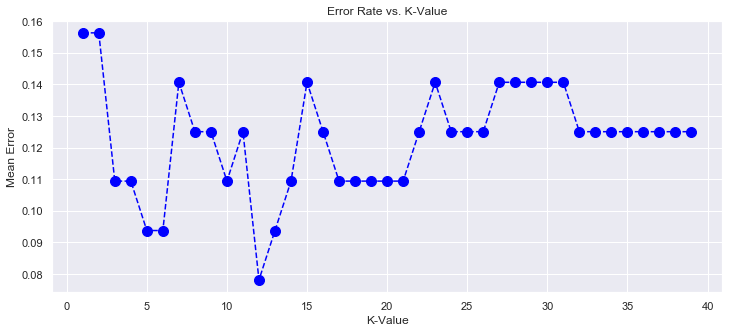

In [109]:
from sklearn.neighbors import KNeighborsClassifier

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 5))
plt.plot(range(1, 40), error, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K-Value')
plt.xlabel('K-Value')
plt.ylabel('Mean Error')

plt.show()

In [106]:
# K=5
from sklearn.metrics import classification_report, confusion_matrix

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print('The Confusion Matrix for the k-NN (k=5) Classifier is: \n \n', confusion_matrix(y_test, y_pred), '\n')
print('The Classification Report for the k-NN (k=5) Classifier is: \n \n', classification_report(y_test, y_pred))

The Confusion Matrix for the k-NN (k=5) Classifier is: 
 
 [[30  2]
 [ 4 28]] 

The Classification Report for the k-NN (k=5) Classifier is: 
 
               precision    recall  f1-score   support

         0.0       0.88      0.94      0.91        32
         1.0       0.93      0.88      0.90        32

    accuracy                           0.91        64
   macro avg       0.91      0.91      0.91        64
weighted avg       0.91      0.91      0.91        64



In [107]:
# K=12
from sklearn.metrics import classification_report, confusion_matrix

classifier = KNeighborsClassifier(n_neighbors=12)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print('The Confusion Matrix for the k-NN (k=12) Classifier is: \n \n', confusion_matrix(y_test, y_pred), '\n')
print('The Classification Report for the k-NN (k=12) Classifier is: \n \n', classification_report(y_test, y_pred))

The Confusion Matrix for the k-NN (k=12) Classifier is: 
 
 [[30  2]
 [ 3 29]] 

The Classification Report for the k-NN (k=12) Classifier is: 
 
               precision    recall  f1-score   support

         0.0       0.91      0.94      0.92        32
         1.0       0.94      0.91      0.92        32

    accuracy                           0.92        64
   macro avg       0.92      0.92      0.92        64
weighted avg       0.92      0.92      0.92        64



In [108]:
# K=20
from sklearn.metrics import classification_report, confusion_matrix

classifier = KNeighborsClassifier(n_neighbors=20)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print('The Confusion Matrix for the k-NN (k=20) Classifier is: \n \n', confusion_matrix(y_test, y_pred), '\n')
print('The Classification Report for the k-NN (k=20) Classifier is: \n \n', classification_report(y_test, y_pred))

The Confusion Matrix for the k-NN (k=20) Classifier is: 
 
 [[28  4]
 [ 3 29]] 

The Classification Report for the k-NN (k=20) Classifier is: 
 
               precision    recall  f1-score   support

         0.0       0.90      0.88      0.89        32
         1.0       0.88      0.91      0.89        32

    accuracy                           0.89        64
   macro avg       0.89      0.89      0.89        64
weighted avg       0.89      0.89      0.89        64



### 6. Extra Credit: Creative Exercise

##### Linear Discriminant Analysis

In [156]:
from sklearn.model_selection import train_test_split

X = data_before1980.drop(['before1980'], axis=1)
y = data_before1980['before1980']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [157]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [158]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(solver = 'svd')
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)

print('The Confusion Matrix for the LDA Classifier is: \n \n', confusion_matrix(y_test, y_pred), '\n')
print('The Classification Report for the LDA Classifier is: \n \n', classification_report(y_test, y_pred))

The Confusion Matrix for the LDA Classifier is: 
 
 [[31  1]
 [ 3 29]] 

The Classification Report for the LDA Classifier is: 
 
               precision    recall  f1-score   support

         0.0       0.91      0.97      0.94        32
         1.0       0.97      0.91      0.94        32

    accuracy                           0.94        64
   macro avg       0.94      0.94      0.94        64
weighted avg       0.94      0.94      0.94        64



##### Quadratic Discriminant Analysis

In [162]:
from sklearn.model_selection import train_test_split

X = data_before1980.drop(['before1980'], axis=1)
y = data_before1980['before1980']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [163]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [164]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

y_pred = qda.predict(X_test)

print('The Confusion Matrix for the QDA Classifier is: \n \n', confusion_matrix(y_test, y_pred), '\n')
print('The Classification Report for the QDA Classifier is: \n \n', classification_report(y_test, y_pred))

The Confusion Matrix for the QDA Classifier is: 
 
 [[27  5]
 [17 15]] 

The Classification Report for the QDA Classifier is: 
 
               precision    recall  f1-score   support

         0.0       0.61      0.84      0.71        32
         1.0       0.75      0.47      0.58        32

    accuracy                           0.66        64
   macro avg       0.68      0.66      0.64        64
weighted avg       0.68      0.66      0.64        64



C:\Users\Kyle Aitken\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
